In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from tqdm import trange

%matplotlib inline
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Define the transform to apply to the data
transform = transforms.Compose([
    # transforms.Resize((224, 224)),
    transforms.ToTensor()
    # transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

batch_size = 64


test = torchvision.datasets.ImageFolder(
    root='images/test',
    transform=transform
)

test_loader = torch.utils.data.DataLoader(
    test,
    batch_size=batch_size,
    shuffle=True,
    num_workers=4
)

train = torchvision.datasets.ImageFolder(
    root='images/train',
    transform=transform
)

train_loader = torch.utils.data.DataLoader(
    train,
    batch_size=batch_size,
    shuffle=True,
    num_workers=4
)

validation = torchvision.datasets.ImageFolder(
    root='images/validation',
    transform=transform
)

validation_loader = torch.utils.data.DataLoader(
    validation,
    batch_size=batch_size,
    shuffle=True,
    num_workers=4
)

visualize

Images shape:  torch.Size([64, 3, 224, 224])
Labels shape:  torch.Size([64])
Mean=0.43442869186401367, Std=0.2507145404815674


(-0.5, 223.5, 223.5, -0.5)

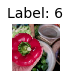

In [2]:
iterr = iter(train_loader)
images, labels = next(iterr)

# Print information and statistics of the first batch of images
print("Images shape: ", images.shape)
print("Labels shape: ", labels.shape)
print(f'Mean={images.mean()}, Std={images.std()}')

i = 2
plt.subplot(4, 5, i+1)
plt.imshow(images[i].permute(1, 2, 0), cmap='gray', interpolation='none')
plt.title(f'Label: {labels[i]}', fontsize=14)
plt.axis('off')

In [3]:
input_size = 1 * 224 * 224  # input spatial dimension of images
hidden_size = 128         # width of hidden layer
output_size = 15          # number of output neurons


class MyCNN(torch.nn.Module):
    
    def __init__(self):
        
        super().__init__()

        # Convolutional layers
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # Fully connected layers
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(512 * 7 * 7, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(),
            torch.nn.Linear(4096, 15),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 512 * 7 * 7)
        x = self.classifier(x)
        return torch.nn.functional.log_softmax(x, dim=1)

# Create an instance of the model and move it to the GPU if available
model = MyCNN().to(DEVICE)

    

# sanity check
print(model)

MyCNN(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

In [4]:
def train_one_epoch(train_loader, model, device, optimizer, log_interval, epoch):
    model.train()
    train_loss = 0
    correct = 0
    losses = []
    counter = []
    
    for i, (img, target) in enumerate(train_loader):
        img, target = img.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = model(img)
        loss = torch.nn.functional.cross_entropy(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        
        if (i+1) % log_interval == 0:
            losses.append(loss)
            counter.append(
                (i * batch_size) + img.size(0) + epoch * len(train_loader.dataset))

    return losses, counter


In [5]:
def test_one_epoch(test_loader, model, device):
    model.eval()
    losses = []
    counter = []
    test_loss = 0
    num_correct = 0
    
    with torch.no_grad():
        for i, (img, label) in enumerate(test_loader):
            img, label = img.to(devitensor.resizce), label.to(device)

            output = model(img)
            test_loss += torch.nn.functional.cross_entropy(output, label, reduction='sum').item()
            pred = output.argmax(dim=1) # Get index of largest log-probability and use that as prediction
            num_correct += pred.eq(label.view_as(pred)).sum().item()

            
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * num_correct / len(test_loader.dataset)
    print(accuracy)
    return test_loss, num_correct


In [6]:
# Hyperparameters
lr = 0.01
max_epochs=3
gamma = 0.95

# Recording data
log_interval = 100

# Instantiate optimizer (model was created in previous cell)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

train_losses = []
train_counter = []
test_losses = []
test_correct = []
for epoch in trange(max_epochs, leave=True, desc='Epochs'):
    train_loss, counter = train_one_epoch(train_loader, model, DEVICE, optimizer, log_interval, epoch)
    test_loss, num_correct = test_one_epoch(test_loader, model, DEVICE)

    # Record results
    train_losses.extend(train_loss)
    train_counter.extend(counter)
    test_losses.append(test_loss)
    test_correct.append(num_correct)

print(f"Test accuracy: {test_correct[-1]/len(test_loader.dataset)}")

Epochs:   0%|          | 0/3 [4:33:34<?, ?it/s]


RuntimeError: Caught RuntimeError in DataLoader worker process 1.
Original Traceback (most recent call last):
  File "/Users/ash/opt/anaconda3/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "/Users/ash/opt/anaconda3/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 61, in fetch
    return self.collate_fn(data)
  File "/Users/ash/opt/anaconda3/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py", line 265, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "/Users/ash/opt/anaconda3/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py", line 143, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/Users/ash/opt/anaconda3/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py", line 143, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/Users/ash/opt/anaconda3/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py", line 120, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
  File "/Users/ash/opt/anaconda3/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py", line 162, in collate_tensor_fn
    out = elem.new(storage).resize_(len(batch), *list(elem.size()))
RuntimeError: Trying to resize storage that is not resizable


In [ ]:
# 1. Draw training loss curve
fig = plt.figure(figsize=(12,8))
plt.plot(train_counter, train_losses, label='Train loss')
plt.plot([i * len(train_loader.dataset) for i in range(1, max_epochs + 1)], 
         test_losses, label='Test loss', marker='o')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title('Loss curve', fontsize=24)
plt.xlabel('Number of training examples seen', fontsize=16)
plt.ylabel('NLL', fontsize=16)
plt.legend(loc='upper right', fontsize=14)

In [ ]:
# 2. Show the predictions of the first 20 images of the test dataset
iterr = iter(train_loader)
images, labels = next(iterr)
images, labels = images.to(DEVICE), labels.to(DEVICE)

output = model(images)
pred = output.argmax(dim=1)

fig = plt.figure(figsize=(12, 11))

# ------------------
# Write your implementation here. Use the code provided in Part 0 to visualize the images.
for i in range (0,20):
    plt.subplot(4, 5, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray', interpolation='none')
    plt.title(f'Label: {labels[i]}', fontsize=14)
    plt.axis('off')
    print("The model predicted a", int(pred[i]), "for image", i+1)
# ------------------

In [ ]:
incorrect_imgs = torch.Tensor().to(DEVICE)
incorrect_preds = [] #torch.IntTensor().to(DEVICE)
incorrect_labels = [] #torch.IntTensor().to(DEVICE)

with torch.no_grad():
    # Test set iterator
    it = iter(test_loader)
    # Loop over the test set batches until incorrect_imgs.size(0) >= 20
    while incorrect_imgs.size(0) < 20:
        images, labels = next(it)
        images, labels = images.to(DEVICE), labels.to(DEVICE)

        # ------------------
        # Write your implementation here.

        output = model(images)
        pred = output.argmax(dim=1)

        # Compare prediction and true labels and append the incorrect predictions
        # using `torch.cat`
        c = 0
        for p in pred:
            if p != labels[c]:
                incorrect_imgs = torch.cat((incorrect_imgs, images[c]), dim=0)
                incorrect_preds.append(p)
                incorrect_labels.append(labels[c])
            c += 1

        # ------------------
                
# Show the first 20 wrong predictions in test set
fig = plt.figure(figsize=(12, 11))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(incorrect_imgs[i].squeeze().cpu().numpy(), cmap='gray', interpolation='none')
    plt.title(f'Prediction: {incorrect_preds[i].item()}\nLabel: {incorrect_labels[i].item()}', fontsize=14)
    plt.axis('off')